In [12]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
import math
from matplotlib import pyplot as plt
import os

In [33]:
mean = np.array([1,2])
cov = np.identity(2)
S = 10

In [49]:
temp_sig_tilda_sa = sum([np.linalg.inv(cov/S) for i in range(S)])
sig_tilda_sa = np.linalg.inv(temp_sig_tilda_sa)
print(sig_tilda_sa)

RHS_mu_tilda_sa_temp =  sum([np.matmul(np.linalg.inv(cov/S), mean.T) for i in range(S)])
mu_tilda_sa = np.matmul(sig_tilda_sa, RHS_mu_tilda_sa_temp) 
mu_tilda_sa

[[0.01 0.  ]
 [0.   0.01]]


array([1., 2.])

In [50]:
temp_sig_tilda = sum([np.linalg.inv(cov) for i in range(S)])
sig_tilda = np.linalg.inv(temp_sig_tilda)
print(sig_tilda)

RHS_mu_tilda_temp =  sum([np.matmul(np.linalg.inv(cov), mean.T) for i in range(S)])
mu_tilda = np.matmul(sig_tilda, RHS_mu_tilda_temp) 
mu_tilda

[[0.1 0. ]
 [0.  0.1]]


array([1., 2.])

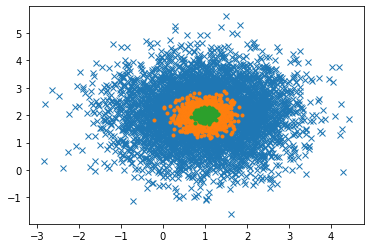

In [53]:
x,y=np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x,y,'x')

x,y=np.random.multivariate_normal(mu_tilda, sig_tilda, 1000).T
plt.plot(x,y,'.')

x,y=np.random.multivariate_normal(mu_tilda_sa, sig_tilda_sa, 1000).T
plt.plot(x,y,'.')

In [17]:
x,y=np.random.multivariate_normal(mean, cov, 5000).T

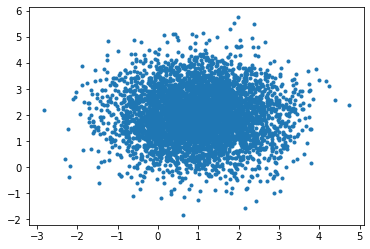

In [18]:
plt.plot(x,y,'.')

In [5]:
np.isinf(.4)

False

In [8]:
not_norm_wts = np.array([100,-99,-55])
not_norm_wts[not_norm_wts < -100] = -100.0
not_norm_wts

array([100, -99, -55])

In [16]:
def logsumexp(x):
    c = x.max()
    return c + np.log(np.sum(np.exp(x - c)))


In [55]:
x = np.array([  -3.0, -55, np.Inf, -np.Inf, np.nan,  -1000, -1000])
np.exp(x - logsumexp(x))

array([nan, nan, nan, nan, nan, nan, nan])

In [53]:
finite_values = x[np.isfinite(x)]
finite_max = np.nanmax(finite_values)
finite_min = np.nanmin(finite_values)
x[x>finite_max] = finite_max
x[x<finite_min] = finite_min
x[np.isnan(x)] = finite_min
x

[   -3.   -55.    inf   -inf    nan -1000. -1000.]
[   -3.   -55. -1000. -1000.]


<ipython-input-53-c62fee3d90ac>:6: RuntimeWarning: invalid value encountered in greater
  x[x>finite_max] = finite_max
<ipython-input-53-c62fee3d90ac>:7: RuntimeWarning: invalid value encountered in less
  x[x<finite_min] = finite_min


array([   -3.,   -55.,    -3., -1000., -1000., -1000., -1000.])

In [54]:
np.exp(x - logsumexp(x))

array([5.00000000e-01, 1.30513953e-23, 5.00000000e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [47]:
x

array([  -3.,  -55.,   inf,  -inf,   nan, 1000., 1000.])

In [56]:
x>finite_max

<ipython-input-56-b855766d4641>:1: RuntimeWarning: invalid value encountered in greater
  x>finite_max


array([False, False,  True, False, False, False, False])

In [1]:
((38*60 + 44) - (33*60+20))/(38*60 + 44)

0.13941480206540446

In [2]:
(33*60+20)

2000

In [10]:
 (400000/100) / (2000)

2.0

In [16]:
n=30
np.random.multinomial(n, [1/n]*n, size=1)

array([[1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 3, 3, 2, 2, 1,
        2, 0, 0, 1, 1, 0, 1, 3]])

In [17]:
np.random.choice(range(n),size=n, p=[1/n]*n)

array([14, 16,  4,  1, 18, 12,  0,  1,  4, 10, 19, 26,  7, 22, 26,  4, 22,
       23, 23, 14,  1, 18, 24,  8, 14,  1,  5, 16, 28, 27])